In [212]:
import numpy as np
import numpy_financial as npf

#dane dot. ceny mieszkania
pv=120000
freq=12
rate=0.05
years=5

#oprocentowanie lokaty
ir=0.12

ir /=freq
rate /=freq

nper=years*freq

periods=np.arange(1,nper+1,dtype=int)

#przyszła cena mieszkania i ceny co miesiąc
fv=-np.around(npf.fv(rate,periods,0,pv),2)
fv

array([120500.  , 121002.08, 121506.26, 122012.53, 122520.92, 123031.42,
       123544.06, 124058.82, 124575.73, 125094.8 , 125616.03, 126139.43,
       126665.01, 127192.78, 127722.75, 128254.93, 128789.32, 129325.95,
       129864.8 , 130405.91, 130949.26, 131494.89, 132042.78, 132592.96,
       133145.43, 133700.2 , 134257.29, 134816.69, 135378.43, 135942.51,
       136508.93, 137077.72, 137648.88, 138222.41, 138798.34, 139376.67,
       139957.4 , 140540.56, 141126.15, 141714.17, 142304.65, 142897.58,
       143492.99, 144090.88, 144691.26, 145294.14, 145899.53, 146507.44,
       147117.89, 147730.88, 148346.43, 148964.54, 149585.22, 150208.49,
       150834.36, 151462.84, 152093.93, 152727.66, 153364.02, 154003.04])

obliczanie comiesięcznej kwoty do wpłaty na lokatę:

In [196]:
pmt=-npf.pmt(ir,nper,0,fv[-1])
pmt

1885.6821665958337

array do wykresu ilości pieniędzy na lokacie:

In [202]:
deposit=[pmt+pmt*ir]
for i in range(0,nper):
    deposit.append((deposit[i]+pmt)+(deposit[i]+pmt)*ir)
deposit2=np.array(deposit)
deposit2

array([  1904.53898826,   3828.12336641,   5770.94358833,   7733.19201248,
         9715.06292086,  11716.75253833,  13738.45905198,  15780.38263076,
        17842.72544533,  19925.69168805,  22029.48759319,  24154.32145738,
        26300.40366022,  28467.94668508,  30657.16514019,  32868.27577986,
        35101.49752592,  37357.05148944,  39635.16099259,  41936.05159078,
        44259.95109495,  46607.08959416,  48977.69947837,  51372.01546141,
        53790.27460429,  56232.71633859,  58699.58249024,  61191.1173034 ,
        63707.5674647 ,  66249.18212761,  68816.21293715,  71408.91405478,
        74027.54218359,  76672.35659369,  79343.61914789,  82041.59432763,
        84766.54925917,  87518.75374002,  90298.48026568,  93106.0040566 ,
        95941.60308543,  98805.55810454, 101698.15267385, 104619.67318885,
       107570.408909  , 110550.65198635, 113560.69749448, 116600.84345768,
       119671.39088052, 122772.64377759, 125904.90920363, 129068.49728393,
       132263.72124503, 1

Text(0, 0.5, 'Wartość')

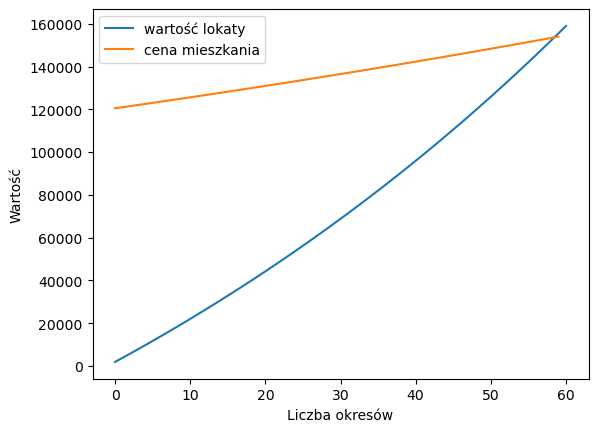

In [214]:
import matplotlib.pyplot as plt

plt.plot(deposit2,label='wartość lokaty')
plt.plot(fv,label='cena mieszkania')
plt.legend()
plt.xlabel('Liczba okresów')
plt.ylabel('Wartość')